In [11]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.generated.generated_data import get_noisy_nonlinear_with_non_noisy_labels
import common_grid_search_analysis
import KNN.common_knn as common_knn
import TrainingCurves

import numpy as np
from sklearn import neighbors

In [12]:
PLOT_PREFIX = "Figures/NOISY_NONLINEAR_KNN_TEST_"
GLOBAL_FIG_COUNTER = 0

GS_FILE_NAME_PREFIX = "Analysis_Data/NOISY_NONLINEAR_KNN"

In [13]:
# Load Data
X_train, X_test, y_train, y_test, y_test_non_noisy = get_noisy_nonlinear_with_non_noisy_labels()
num_features = X_train.shape[1]

In [14]:
# Start with Learning Curve on Default Classifier
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(neighbors.KNeighborsClassifier(), X_train, y_train, "accuracy")

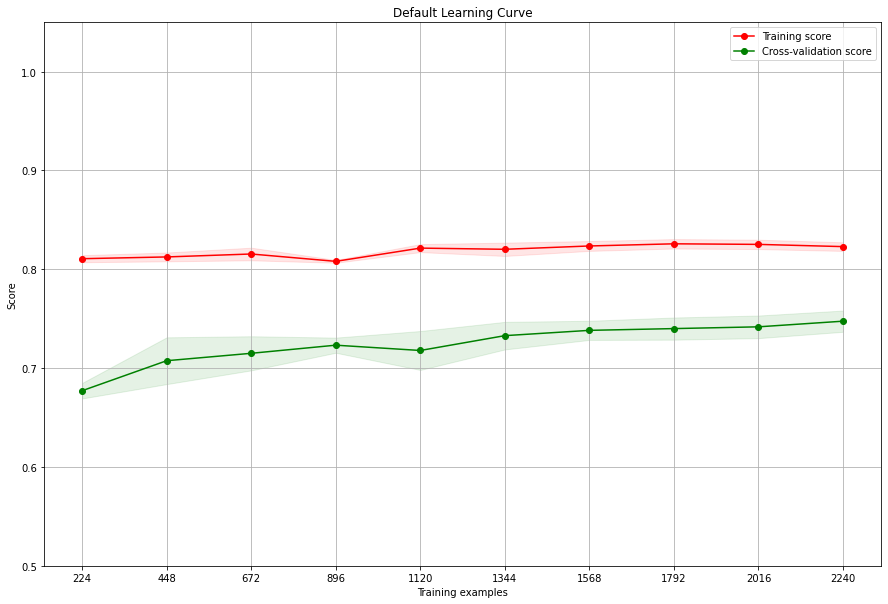

In [15]:
ylim=(0.5, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)

In [16]:
n_neighbors = [i for i in range(80)]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p = [1, 2, 3]

leaf_size = [i for i in range(100)]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 800 | elapsed:    3.5s remaining:   35.1s
[Parallel(n_jobs=-1)]: Done 153 out of 800 | elapsed:    6.2s remaining:   26.3s
[Parallel(n_jobs=-1)]: Done 234 out of 800 | elapsed:    8.9s remaining:   21.5s
[Parallel(n_jobs=-1)]: Done 315 out of 800 | elapsed:   11.7s remaining:   18.0s
[Parallel(n_jobs=-1)]: Done 396 out of 800 | elapsed:   14.3s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done 477 out of 800 | elapsed:   17.1s remaining:   11.6s
[Parallel(n_jobs=-1)]: Done 558 out of 800 | elapsed:   19.9s remaining:    8.6s
[Parallel(n_jobs=-1)]: Done 639 out of 800 | elapsed:   22.5s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done 720 out of 800 | elapsed:   25.4s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   28.0s finished


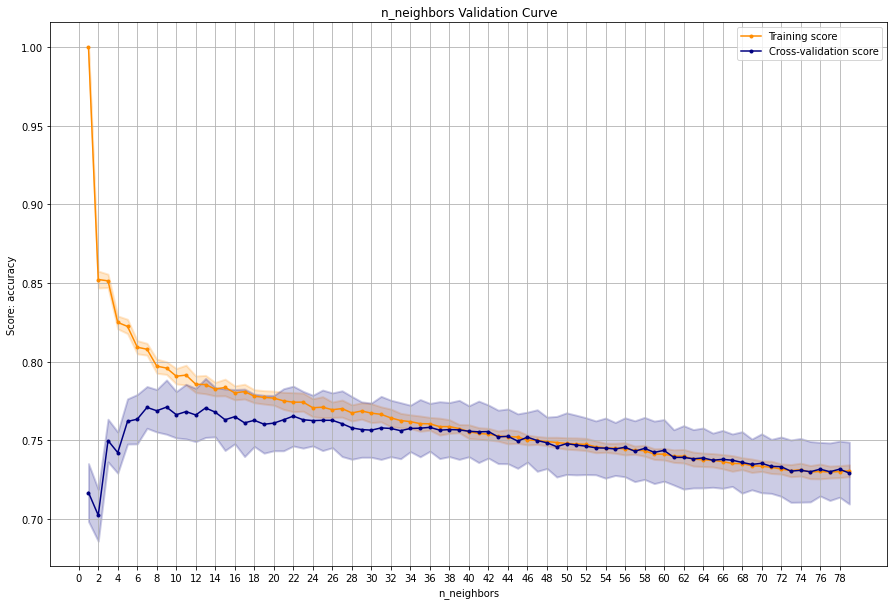

In [17]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(), X_train, y_train, "n_neighbors", n_neighbors, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "n_neighbors", n_neighbors, title="n_neighbors Validation Curve", scoring="accuracy", tick_spacing=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  30 | elapsed:    0.2s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed:    0.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:    0.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:    1.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    1.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0319s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  72 out of 800 | elapsed:    3.0s remaining:   30.3s
[Parallel(n_jobs=-1)]: Done 153 out of 800 | e

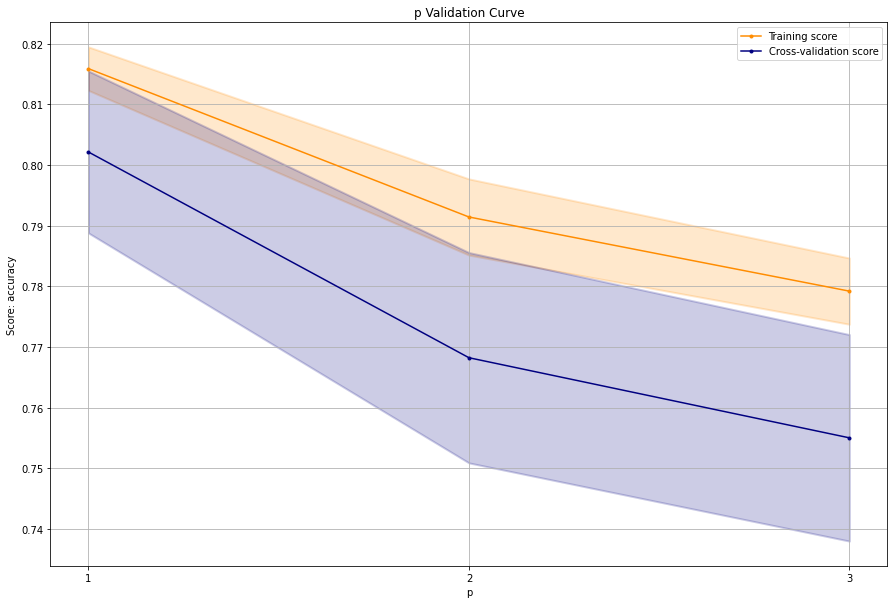

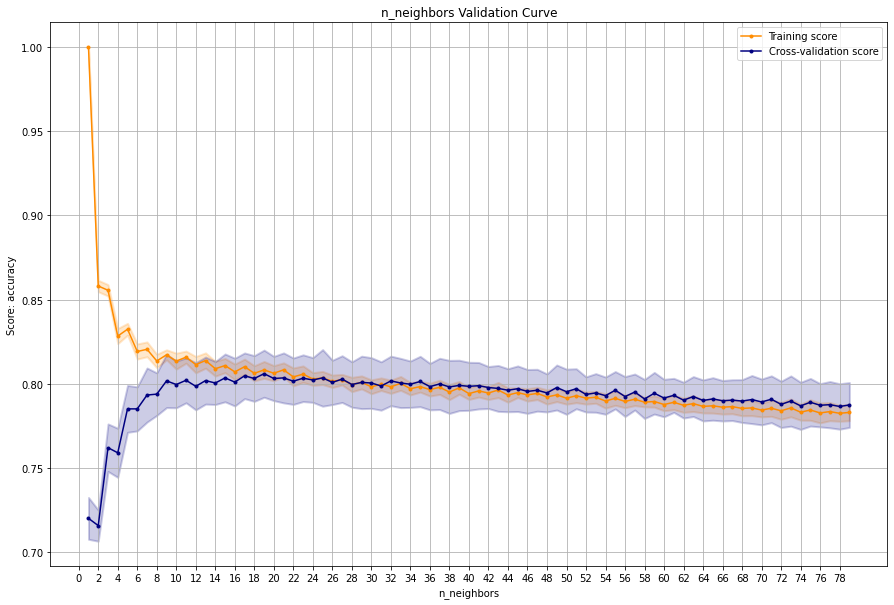

In [18]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(n_neighbors=11), X_train, y_train, "p", p, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "p", p, title="p Validation Curve", scoring="accuracy", tick_spacing=1)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(p=1), X_train, y_train, "n_neighbors", n_neighbors, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "n_neighbors", n_neighbors, title="n_neighbors Validation Curve", scoring="accuracy", tick_spacing=2)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of  40 | elapsed:    0.2s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   6 out of  40 | elapsed:    0.3s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  11 out of  40 | elapsed:    0.5s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  16 out of  40 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  21 out of  40 | elapsed:    0.8s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  26 out of  40 | elapsed:    1.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  31 out of  40 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  36 out of  40 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of  81 | elapsed:    0.0s remaining:    4.0s
[Parallel(n_jobs=-1)]: Batch computation too fas

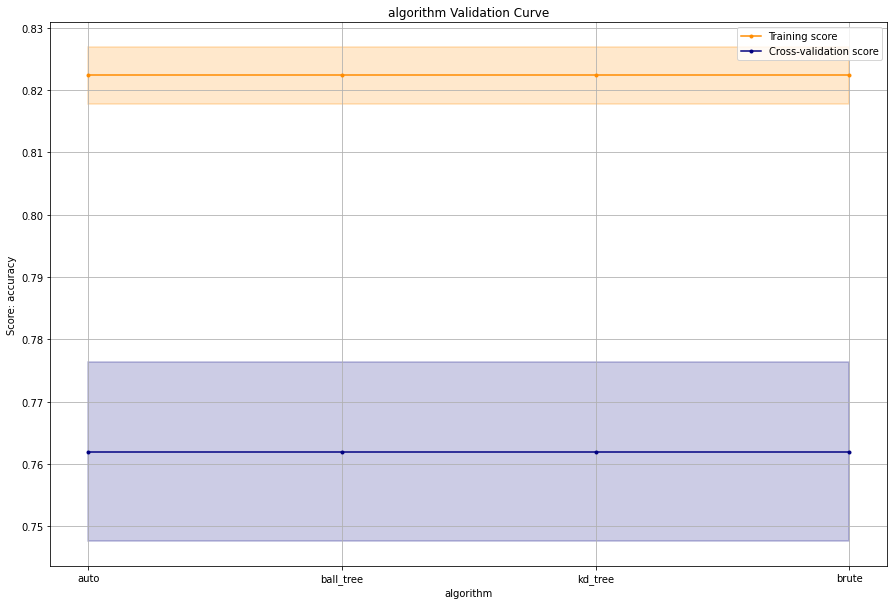

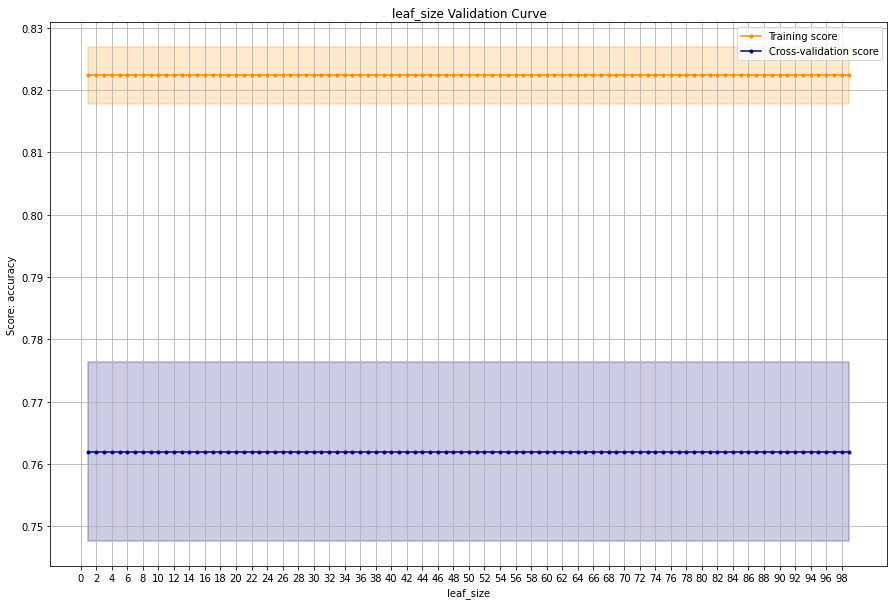

In [19]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(), X_train, y_train, "algorithm", algorithm, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "algorithm", algorithm, title="algorithm Validation Curve", scoring="accuracy", tick_spacing=1)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(algorithm='ball_tree'), X_train, y_train, "leaf_size", leaf_size, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "leaf_size", leaf_size, title="leaf_size Validation Curve", scoring="accuracy", tick_spacing=2)

In [20]:
params = {"n_neighbors": 35, "p":1}
# Start with Learning Curve on Default Classifier
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(neighbors.KNeighborsClassifier(**params), X_train, y_train, "accuracy")

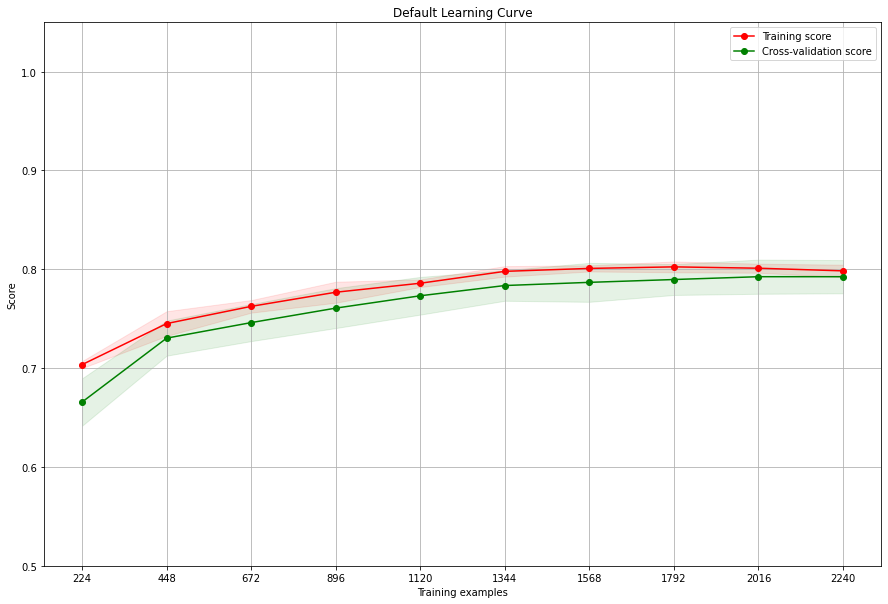

In [21]:
ylim=(0.5, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)




In [22]:
clf = neighbors.KNeighborsClassifier(**params)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.8057142857142857

In [23]:
clf.score(X_test, y_test_non_noisy)

0.9442857142857143